In [155]:
import sys
sys.path.append('../')
from utils import utils
import numpy as np
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from utils.utils import RANDOM_SEED

In [156]:
digits = load_digits()
print(digits.data.shape)
## 8 x 8 px images vectorized to 64 features
data = digits.data


(1797, 64)


In [157]:
# print("Target class:",digits.target[0])
# plt.gray()
# plt.matshow(digits.images[0])
# plt.show()

In [158]:
n_components = 64 
gmm = GaussianMixture(n_components=n_components, random_state=RANDOM_SEED)
gmm.fit(data)

# Step 3: Generate new data points from the trained GMM
n_samples = 100  # You can adjust the number of samples to generate

# Generate new data points
generated_data, _ = gmm.sample(n_samples)

# Reshape the generated data to be compatible with the original dataset
generated_data = generated_data.reshape((n_samples, 8, 8))


In [159]:
## train a random forest classifier on the generated data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


def random_forest_digits(digits,verbose=False):
    ## split data into train and test
    data = digits.data
    target = digits.target

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=0)

    # Train a Random Forest classifier on the training data
    clf = RandomForestClassifier(random_state=0)
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate and display the accuracy of the classifier
    accuracy = accuracy_score(y_test, y_pred)
    if verbose:
        print(f"Accuracy of Random Forest Classifier on Original Digits Dataset: {accuracy:.2f}")

    return clf

random_forest_digits = random_forest_digits(digits,verbose=True)

Accuracy of Random Forest Classifier on Original Digits Dataset: 0.97


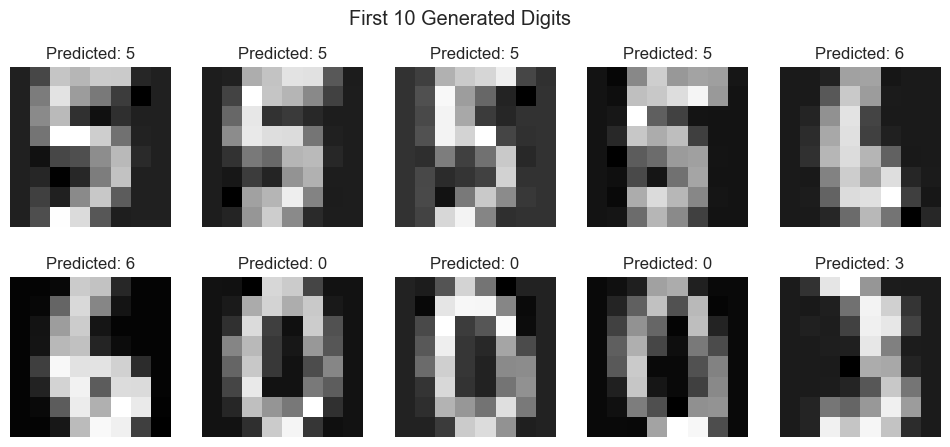

In [160]:
## insepct the performance of the classifier on the generated data
# Make predictions on the generated data

predicted_generated_labels = []

for i in range(n_samples):
    predicted_generated_labels.append(random_forest_digits.predict(generated_data[i].reshape(1, -1))[0])

predicted_generated_labels

# Visualize the first 10 generated digits
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(generated_data[i].reshape(8, 8), cmap='gray')
    plt.title(f'Predicted: {predicted_generated_labels[i]}')
    plt.axis('off')
plt.suptitle('First 10 Generated Digits')
plt.show()

### Results show that the RandomForestClassifier on the generated data behaves as a human subject

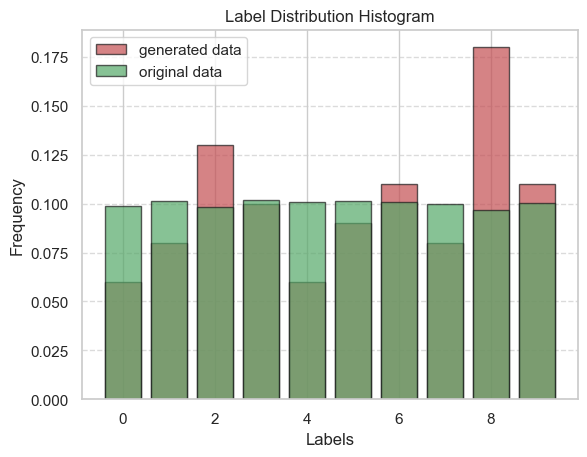

In [161]:
### plot label distribution in the generation data
# Create a histogram of the label distribution
plt.hist(predicted_generated_labels, bins=range(max(predicted_generated_labels) + 2), align='left', rwidth=0.8, alpha=0.7, color='r', edgecolor='k',density=True,label='generated data')
plt.hist(digits.target, bins=range(max(digits.target) + 2), align='left', rwidth=0.8, alpha=0.7, color='g', edgecolor='k',density=True,label='original data')

# Customize the plot
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.legend()
plt.title('Label Distribution Histogram')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [162]:
## estimate MMD
import torch

generated_data.reshape(generated_data.shape[0],-1).shape
# digits.data[:100].shape


result = utils.MMD(torch.tensor(generated_data.reshape(generated_data.shape[0],-1)), torch.tensor(digits.data[:100]), kernel="inverse_multi_quadratic")
print("MMD between generated and initial probability distribution",result)

MMD between generated and initial probability distribution tensor(0.0811)
